In [118]:
# Firstly, I imported all the libraries I could possiblly use
import pandas as pd
from sklearn.metrics import \
    r2_score, get_scorer
from sklearn.linear_model import \
    Lasso, Ridge, LassoCV,LinearRegression
from sklearn.preprocessing import \
    StandardScaler, PolynomialFeatures
from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate, train_test_split    
from sklearn import decomposition, datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [119]:
# Here I made the program read our CSV about heart conditions
df = pd.read_csv ("/content/heart.csv")
print(df.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [120]:
# This graphic shows the correlation between the columns 
import seaborn as sns
cmap =sns.diverging_palette(5, 250, as_cmap=True)
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]
df.corr().style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

<ipython-input-120-c0a7d4a24423>:15: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap, axis=1)\


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.27,0.22,0.12,-0.13,-0.39,0.09,0.21,-0.17,0.27,0.07,-0.23
sex,-0.10,1.00,-0.04,-0.08,-0.20,0.03,-0.06,-0.05,0.14,0.08,-0.03,0.11,0.20,-0.28
cp,-0.07,-0.04,1.00,0.04,-0.08,0.08,0.04,0.31,-0.40,-0.17,0.13,-0.18,-0.16,0.43
trestbps,0.27,-0.08,0.04,1.00,0.13,0.18,-0.12,-0.04,0.06,0.19,-0.12,0.10,0.06,-0.14
chol,0.22,-0.20,-0.08,0.13,1.00,0.03,-0.15,-0.02,0.07,0.06,-0.01,0.07,0.10,-0.10
fbs,0.12,0.03,0.08,0.18,0.03,1.00,-0.10,-0.01,0.05,0.01,-0.06,0.14,-0.04,-0.04
restecg,-0.13,-0.06,0.04,-0.12,-0.15,-0.10,1.00,0.05,-0.07,-0.05,0.09,-0.08,-0.02,0.13
thalach,-0.39,-0.05,0.31,-0.04,-0.02,-0.01,0.05,1.00,-0.38,-0.35,0.40,-0.21,-0.10,0.42
exang,0.09,0.14,-0.40,0.06,0.07,0.05,-0.07,-0.38,1.00,0.31,-0.27,0.11,0.20,-0.44
oldpeak,0.21,0.08,-0.17,0.19,0.06,0.01,-0.05,-0.35,0.31,1.00,-0.58,0.22,0.20,-0.44


In [121]:
# New variable which filters the data values that the wearable isn't able to find
w_df = df[['age', 'sex','trestbps', 'fbs', 'restecg', 'thalach', 'oldpeak', 'slope','target']]

In [122]:
# Here I define my target colunm and what is the training and what is the testing set
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(w_df.iloc[:, :-1],
                                                    w_df.iloc[:, -1],
                                                    test_size=0.4)

In [123]:
# sc = StandardScaler()
# X_scaled = sc.fit_transform(X_train)
# X_scaled = pd.DataFrame(data = X_scaled, columns = X.columns)

In [124]:
# Here I define the best params I got in the code more under there 
std_slc = StandardScaler()
pca = decomposition.PCA()
lasso = linear_model.Lasso(alpha=-0.027407081977257608, normalize=True)
pipe = Pipeline(steps=[("std_slc", std_slc),
                        ("pca", pca),
                        ("lasso", lasso)])
n_components = list(range(1,X_train.shape[1]+1,1))
normalize = [True, False]
selection = ["cyclic", "random"]
parameters = dict(pca__n_components=n_components,
                  lasso__normalize=normalize,
                  lasso__selection=selection)

In [113]:
# This is the part I printed the gridsearch results 
clf = GridSearchCV(pipe, parameters)
clf.fit(X_train, y_train)
print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
CV_Result = cross_val_score(clf, X_train, y_train, cv=10, n_jobs=-1, scoring="r2")
print(CV_Result)
print(CV_Result.mean())
print(CV_Result.std())

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.331e+01, tolerance: 1.

Best Number Of Components: 3
[0.38351392 0.16731498 0.3634855  0.23296161 0.36010159 0.12673574
 0.11180714 0.38864136 0.25432358 0.35220554]
0.27410909524849514
0.10398045839317331


In [114]:
# When the best params used a little above are printed
print(clf.best_estimator_.get_params()["lasso"])

Lasso(alpha=-0.027407081977257608, normalize=False, selection='random')


In [115]:
# Code that obtains the model's accuracy 
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
logistic_preds = reg.fit(X_train, y_train).predict(X_test)
logistic_acc = accuracy_score(y_test, logistic_preds.round().astype(int))
print('Logistic Accuracy: {}'.format(logistic_acc))

Logistic Accuracy: 0.7609756097560976


In [116]:
# Validation metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_preds.round().astype(int)))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       185
           1       0.78      0.79      0.78       225

    accuracy                           0.76       410
   macro avg       0.76      0.76      0.76       410
weighted avg       0.76      0.76      0.76       410



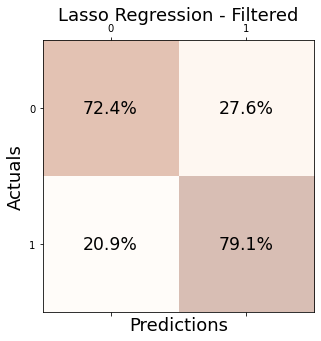

In [117]:
# Confusion matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_test, logistic_preds.round(0).astype(int),normalize='true')
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=str(round(conf_matrix[i, j]*100,1))+'%', va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Lasso Regression - Filtered', fontsize=18)
plt.show()